<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example on iris dataset**

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.decomposition import  PCA

In [5]:
pca = PCA(n_components=2)

In [7]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [8]:
from matplotlib import pyplot as plt

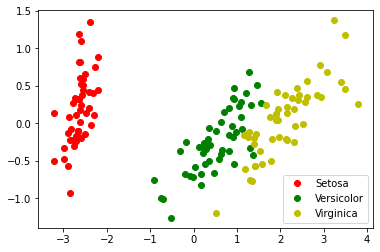

In [28]:
plt.plot(new_pca[:50,0],new_pca[:50,1], 'or' , label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1], 'og' , label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1], 'oy' , label='Virginica')
plt.legend()

## MDS (Multidimensional Scaling)

# Distance

In [14]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [15]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [16]:
import numpy as np

In [17]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [18]:
(0.04 + 0.25)**(0.05)

0.9399827849205659

## Distance Matrix

In [20]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

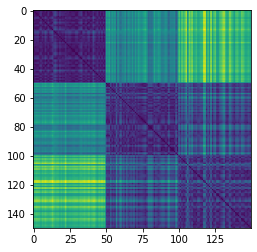

In [21]:
plt.imshow(dis_matrix)

## ทำ MDS 

In [22]:
from sklearn.manifold import  MDS

In [23]:
mds = MDS(n_components=2)

In [24]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

In [25]:
new_mds

array([[-2.70722759,  0.19768876],
       [-2.63317169,  0.73306173],
       [-2.8230627 ,  0.69089566],
       [-2.63674947,  0.86221184],
       [-2.7600618 ,  0.17910829],
       [-2.38826934, -0.33215285],
       [-2.79375765,  0.61011818],
       [-2.61819161,  0.33977216],
       [-2.72928687,  1.12549345],
       [-2.6059414 ,  0.64432771],
       [-2.59053966, -0.17826116],
       [-2.57735316,  0.47654765],
       [-2.6921568 ,  0.79871045],
       [-3.07791659,  1.11861375],
       [-2.83360444, -0.7009228 ],
       [-2.60470758, -0.91292493],
       [-2.74579569, -0.33756466],
       [-2.67255342,  0.18730526],
       [-2.32828184, -0.46926309],
       [-2.66058654, -0.05091612],
       [-2.34104304,  0.04126482],
       [-2.59715673,  0.0208084 ],
       [-3.22248364,  0.45592995],
       [-2.28254014,  0.32809079],
       [-2.29312437,  0.52904556],
       [-2.42491479,  0.67592134],
       [-2.455651  ,  0.32800168],
       [-2.59429603,  0.13149597],
       [-2.66165355,

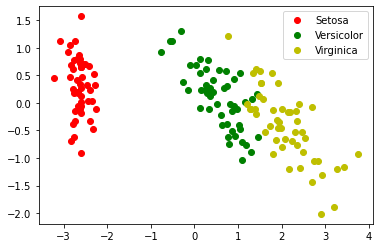

In [27]:
plt.plot(new_mds[:50,0],new_mds[:50,1], 'or' , label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1], 'oy' , label='Virginica')
plt.legend()

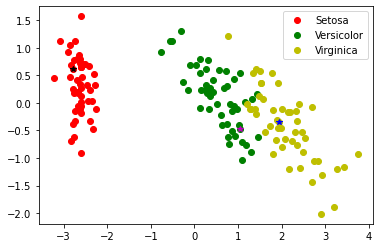

In [32]:
plt.plot(new_mds[:50,0],new_mds[:50,1], 'or' , label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1], 'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1], '*k')
plt.plot(new_mds[56,0],new_mds[56,1], '*m')
plt.plot(new_mds[116,0],new_mds[116,1], '*b')
plt.legend()

### การใช้ Pre-computed Distance Matrix

In [33]:
mds2 = MDS(n_components=2, dissimilarity='precomputed')

In [34]:
new_mds2 = mds2.fit_transform(dis_matrix)

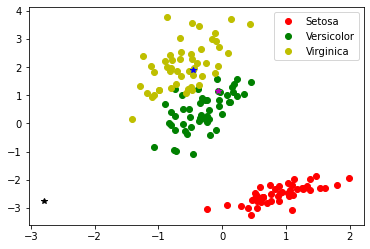

In [36]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1], 'or' , label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1], 'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds2[6,1], '*k')
plt.plot(new_mds2[56,0],new_mds2[56,1], '*m')
plt.plot(new_mds2[116,0],new_mds2[116,1], '*b')
plt.legend()